# PEARL Governing Equations

## Overview
* [Power](#Power)
* [Propulsion](#Propulsion)
* [Structure](#Structure)
* [Communication](#Communication)
* [Computing](#Computing)
* [Navigation](#Navigation)

## Power

Four operations:
1. [platform is recharging](#Recharging)
2. [platform is servicing an AUV](#Servicing)
3. [platform is transmitting data to satellite](#Transmitting)
4. [platform is moving](#Moving)

In the following analysis, all operations are considered independent (platform can only be doing one of the four), however operations could be occuring at the same time. For instance, the platform itself could be recharging while servicing an AUV and transmitting data to a satellite (operations 1, 2, and 3). Depending on the sea state, the platform could also be moving while doing operations 1-3.

OPM?

### Recharging
Power draw when platform, PEARL, is recharging, will be

\begin{equation}
P_{draw,recharge} = P_{hotel} - P_{recharge}
\end{equation}

where
* $P_{hotel}$ = is the nominal power draw from all sensors onboard the platform to keep it active (hotel load) [W]
* $P_{recharge}$ = is the energy harnessed recharging the platform [W]

So long as the platform can harness more energy than it uses, this value will be negative, meaning the power draw is negative and the platform is actually recharging itself and storing energy.

Assuming solar power is being used to recharge the platform, the power to recharge can be determined from considering the end-of-life performance of the solar panels

\begin{equation}
P_{recharge} = \eta_s \phi_s \cos \left(\bar{\theta}\right) I_d (1-D)^L A_s
\end{equation}

where 
* $\eta_s$ = the solar cell efficiency, nominally 27%, ranging from 15-44% (note that increasing solar cell efficiency increases cost per cell and degradation will change according to new solar cell material)
* $\phi_s$ = incident solar irradiation, determined by the location [w/m$^2$]
* $\bar{\theta}$ = average solar angle (from the vertical) over a day, nominally 55$^{\circ}$, ranging from 50.5-68$^{\circ}$. The nominal is a fixed, flat solar panel. It changes if the solar panel is slanted (requires orientation control) or gimbaled (requires solar array drive)
* $D$ = solar cell degradation, nominally set to 1%/year, ranging from 0.1-2%/year, depending on solar cell material.
* $I_d$ = inherent degradation, an efficiency parameter that describes the fraction of solar panel area that is actually solar cells, taken to be between 0.85-0.9. Value may also come from actual solar panel and use actual cell area from manufacturer. This term accounts for reduction in solar cell efficiency when you integrate it into an array. So could be due to the fact that the total panel area cannot be covered 100% in solar cells because of the interconnects and spacing between them. Can also use that term to account for if you expect any shadowing of cells by other components on the platformo for if the solar cells will be operating at a temperature different than what the efficiency is quoted at. According to SMAD for spacecraft it’s common to use $I_d$ = 0.72 (or ranging between 0.49 and 0.88). For this analysis, we neglect any shadowing issues for the servicing platform as well as efficiency degradations due to temperature (which are a bigger issue in space).
* $L_s$ = lifetime for solar panels, nominally 10 years, ranges from 1-25 years [yrs]
* $A_s$ = solar panel area [m$^2$]

Then the total energy collected to recharge the platform's batteries via solar power is
\begin{equation}
E_{recharge} = P_{recharge}t_r
\end{equation}

where
* $t_r$ = time the platform is recharging, nominally taken to be number of daylight hours [hrs]
* making the assumption that the average solar angle over the day does not deviate much from $\bar{\theta}$ (to keep things simplistic for now)

In [1]:
import numpy as np
P_hotel = 50 #Watts
eta_s_vec = np.linspace(0.15,0.44,1000)
phi_s = 800 # W/m^2 in Massachusetts ?
theta_bar = 55 # deg
D = 0.005  # degradation in decimal of percent per year
I_d = 0.9 # inherent degradation, efficiency parameter that describes the fraction of solar panel area that is actually solar cells
L_s = 10 # lifetime in years
t_r = 12 # hours the platform is recharging (taken to be number of daylight hours)

### Servicing
Power draw when platform, PEARL, is servicing an AUV (recharging AUV and downloading its data) will be

\begin{equation}
P_{draw,service} = P_{hotel} + P_{service}
\end{equation}

where
* $P_{service}$ = is the power draw to recharge the AUV [W] and is given by
\begin{equation}
P_{service} = \frac{E_{AUV}}{t_{service}}\gamma
\end{equation}

where
* $E_{AUV}$ = AUV battery capacity [Wh]
* $t_{service}$ = duration of time that AUV is connected to platform recharging and offloading data (not necessary how long an AUV takes to be serviced on the platform, just the time that the platform will be in "service" mode) [hrs]
* $\gamma$ = AUV serviced per day (0.2 means 1 AUV every 5 hours). Nominally taken to be 0.2 AUV/day, ranging from 0.03 to 1 AUV/day (i.e. monthly to daily). [AUVs/hr]

In [2]:
E_AUV = 1900 # Wh for Bluefin-9
t_service = 12 # hours
gamma = np.array([2, 3, 4,]) # AUVs per day
P_service = E_AUV / t_service * gamma

### Transmitting
Power draw to transmit data will be

\begin{equation}
P_{draw,comms} = P_{hotel} + P_{comms}
\end{equation}

where
* $P_{hotel}$ = is the nominal power draw from all sensors onboard the platform to keep it active (hotel load) [W]
* $P_{comms}$ = is the power required to transmit data to a satellite [W]

### Moving
Power draw to move platform will be

\begin{equation}
P_{draw,move} = P_{hotel} + P_{move}
\end{equation}

where
* $P_{hotel}$ = is the nominal power draw from all sensors onboard the platform to keep it active (hotel load) [W]
* $P_{move}$ = is the power required to move the platform, and is determined from the propulsion system [W] 

### Sizing solar panels
The size of the solar panels can be determined from the daily energy needs of the platform, assuming that all energy needs are met by solar energy

\begin{eqnarray}
E_{req} &=& E_{hotel} + E_{service} + E_{comms} + E_{move} \\
E_{recharge} = E_{req} &=& P_{hotel}t_{mission} + P_{service}t_{service} + P_{comms}t_c + P_{move}t_m \\
P_{recharge}t_r &=& P_{hotel}t_{mission} + E_{AUV}\gamma + P_{data}t_d + P_{move}t_m \\
\left( \eta_s \phi_s \cos \left(\bar{\theta}\right) I_d (1-D)^L A_s \right) t_r &=&  P_{hotel}t_{mission} + E_{AUV}\gamma + P_{data}t_d + P_{move}t_m \\
\Rightarrow A_s &=& \frac{\left( P_{hotel}t_{mission} + E_{AUV}\gamma + P_{data}t_d + P_{move}t_m \right)}{\left( \eta_s \phi_s \cos \left(\bar{\theta}\right) I_d (1-D)^{L_s} t_r \right)}
\end{eqnarray}

where
* $E_{hotel}$ = the total energy required to power the sensors onboard the platform to keep it active (hotel load) throughout the duration of the mission [Ws]
* $E_{service}$ = the total energy required to service the AUVs during the mission [Ws]
* $E_{comms}$ = the total energy required to transmit data during the mission [Ws]
* $E_{move}$ = the total energy required to move the platform during the mission [Ws]
* $t_{mission}$ = total duration of the mission of the platform, taken to be 1 day [s]
* $t_c$ = total time platform is transmitting data per mission [s]
* $t_m$ = total time platform is moving per mission [s]

In [3]:
from matplotlib import pyplot as plt 
t_mission = 24 #hours 

# will be determined from communication section
# will feedback via MDO, but for now put back in by hand
P_data = 0 # W
t_d = 0 # hours

# will be determined from propulsion section
# will feedback via MDO, but for now put back in by hand
P_move = 6824 # W
t_m = 0.05*t_mission # assuming moving only 5% of the mission

numer = P_hotel * t_mission + P_service * t_service + P_data * t_d + P_move * t_m
denom = eta_s_vec*phi_s*np.cos(np.deg2rad((theta_bar)))*I_d*((1-D)**L_s)*t_r

fig = plt.figure()
ax = plt.subplot(111)
for g in range(0,len(gamma)):
    A_s_vec = numer[g]/denom
    ax.plot(eta_s_vec,A_s_vec,label= str(gamma[g])+" AUVs/day")

plt.xlabel('Solar Cell Efficiency $\eta_s$')
plt.ylabel('Required Solar Panel Area, $A_s$ [m$^2$]')
ax.set_xlim([0.15,0.45])
ax.legend()
plt.show()

A_s = max(A_s_vec) # take the maximum area for now, which occurs for 4 AUVs/day
eta_s = min(eta_s_vec) # take the minimum efficiency for now

P_recharge = eta_s*phi_s*np.cos(np.deg2rad((theta_bar)))*I_d*((1-D)**L_s)*A_s # W
E_req = P_recharge*t_r*60*60 # multiplying by 3600 because t_r in hours
print(E_req) # Ws, a.k.a Joules

<Figure size 640x480 with 1 Axes>

61159680.00000002


## Propulsion
In order for the platform to move, it needs to overcome drag. The energy required to overcome drag is

\begin{equation}
E_{move} = \frac{\rho C_d S_w V^3}{2 \eta_m}t_m
\end{equation}

where
* $E_{move}$ = energy required for propulsion to overcome drag [Ws]
* $\rho$ = density of water [kg/m$^3$]
* $C_d$ = drag coefficient 
* $S_w$ = wetted surface area of platform [m$^2$]
* $V$ = velocity of platform [m/s]
* $\eta_m$ = propulsion efficiency
* $t_m$ = time of motion [s]

The power to move the platform is thus given by
\begin{equation}
P_{move} = \frac{\rho C_d S_w V^3}{2 \eta_m}
\end{equation}

In [4]:
rho = 1023.6 # density of seawater [kg/m^3]
C_d = 1 # estimate drag coefficient (a square flat plate at 90 deg to the flow is 1.17)
S_w = 10 # will technically need to determine from A_s and other structural needs... assume something for now
V = 1 # [m/s]
eta_m = 0.75 # estimated, need to determine from motors?

P_move = rho*C_d*S_w*V**3/(2*eta_m)

## Structure
The structure of the platform will be determined by a number of different driving factors including
* [platform mass](#Mass)
* [platform stability](#Stability)
* [platform hydrodynamic response](#Hydrodynamic)

### Mass
Total mass of the platform will be given by 

\begin{equation}
m_{platform} = m_{batteries} + m_{solar} + m_{comms} + m_{propulsion} + m_{structure}
\end{equation}

where
* $m_{batteries}$ = the mass of the batteries on board the platform
* $m_{solar}$ = the mass of the solar panels on board the platform
* $m_{comms}$ = the mass of the comms system used to transmit data to the satellite constellations
* $m_{propulsion}$ = the mass of the propulsion system on the platform
* $m_{structure}$ = the mass of the structure of the platform

The mass of the batteries are given by
\begin{equation}
m_{batteries} = \frac{E_{battery}}{\mu_{battery}}
\end{equation}

where
* $E_{battery}$ = the power storage capacity of the battery [Wh]
* $\mu_{battery}$ = the battery specific energy (depends on the battery type selected) [Wh/kg]

The power storage capacity of the battery onboard the platform is
\begin{equation}
E_{battery} = \frac{E_{req}}{\left(DOD\right) N \eta_{battery}}
\end{equation}

where 
* $E_{req}$ = the energy the platform requires daily to meet the power needs of the hotel load, the propulsion system, the data transmitting system, and the AUV servicing system. [Wh]
* $DOD$ = the depth of discharge of the battery, nominally taken to be 70% and can range from 50-90%. $DOD$ depends on the lifetime of the battery and battery type selected, which affects the battery specific volume, mass, and cost.
* $\eta_{battery}$ = the transmission efficiency between the battery and the load
* $N$ = number of batteries

The volme of the batteries on board is given by
\begin{equation}
V = E_{battery} \nu_{battery}
\end{equation}

where
* $\nu_{battery}$ = the battery energy density (depends on the battery type selected)

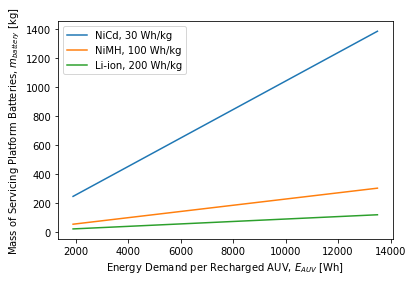

In [5]:
E_AUV_vec = np.linspace(1900, 13500, 1000) # in Wh, AUV energy demand per recharge
mu_battery = np.array([30, 100, 200]) # in Wh/kg for NiCd, NiMH, Li-ion
DOD = np.array([0.4, 0.55, 0.7]) # depth of discharge of the battery
eta_battery = 0.85 # transmission efficiency between battery and the load
N = 1 # number of batteries

fig = plt.figure()
ax = plt.subplot(111)
for jj in range(0,len(mu_battery)):
    E_battery = (E_AUV_vec+P_hotel*t_r)/(DOD[jj]*N*eta_battery)
    m_battery = E_battery/mu_battery[jj]
    ax.plot(E_AUV_vec,m_battery)

plt.xlabel('Energy Demand per Recharged AUV, $E_{AUV}$ [Wh]')
plt.ylabel('Mass of Servicing Platform Batteries, $m_{battery}$ [kg]')
ax.legend(['NiCd, 30 Wh/kg','NiMH, 100 Wh/kg', 'Li-ion, 200 Wh/kg'])
plt.show()

### Stability

![Image of Stability](img/stability.png)

where
* G = Centre of gravity, an imaginary point in the exact middle of a weight where the entire weight may be considered to act. (The force of) weight always acts vertically downwards.
* B = the center of buoyancy, an imaginary point in the exact middle of the volume of displaced water where the entire buoyancy may be considered to act. (The force of) buoyancy always acts vertically upwards.
* M = the metacenter, a point in space where the vertical line upwards through the centre of buoyancy (B) of the ‘inclined’ vessel cuts through the vertical line upwards through the centre of buoyancy (B) of the ‘upright’ vessel.
* GM = the metacentric height, the vertical distance between the Centre of Gravity (G) and the Metacentre (M). If M is above G the vessel will want to stay upright and if G is above M the vessel will want to capsize. i.e. GM positive is Stable, GM negative is Unstable.\
* (+GZ) = the righting lever, or (-GZ) = the overturning lever: the (horizontal) distance between the two (vertical) ‘lines of action’ of the buoyancy force (upwards), and the gravity force (downwards). The size of GZ is the measure of how stable or unstable the vessel is at any particular angle of heel. For small angles of heel (less than 15°), the ‘righting’ or ‘overturning lever’ GZ = GM x sine (where is the angle of heel, in degrees).
* K = keel of the vessel


![PEARL Problem Formulation](img/problemFormulation_PEARL.pdf)

#### Initial stability
To be adequately stable, the metacentric height (GM) of the loaded vessel, floating upright in still water, is required to be above a minimum value.

\begin{equation}
GM = KB + BM - KG
\end{equation}

where
* KB is the center of buoyancy above the keel
* BM = $\frac{I}{\forall}$ where $I$ = is the second moment of area of the water plane area, $\forall$ is the displaced volume
* KG is the center of gravity above the keel

The center of buoyancy above the keel is:
\begin{equation}
KB = \frac{h_f+t_s+t_d}{2}
\end{equation}

The center of gravity above the keel is:
\begin{equation}
KG = \left(h_f+t_s+t_d\right)-z_G
\end{equation}

where $z_G$ is the center of gravity of PEARL, a design variable (the center of mass as measured from the still water line (SWL)).

The second moment of area of the water plan area, $I$, is:
\begin{equation}
I = \frac{\pi}{4}\left(\frac{D_f}{2}\right)^4 = \frac{\pi}{64} D_f^4
\end{equation}

and the submerged volume, $\forall$, is:
\begin{equation}
\forall = \frac{\pi}{4} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right) 
\end{equation}

Thus, the metacentric height, $GM$ becomes:
\begin{eqnarray}
GM &=& KB + BM - KG \\
&=& \frac{h_f+t_s+t_d}{2} + \frac{\frac{\pi}{64} D_f^4}{\frac{\pi}{4} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)} - \left(\left(h_f+t_s+t_d\right)-z_G\right) \\
&=& \frac{D_f^4}{16 \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)} - \frac{h_f + t_s + t_d}{2} + z_G
\end{eqnarray}


From this, a number of conditions are required for initial stability:
* If M above G $\rightarrow$ stable
* If GM > 0 $\rightarrow$ stable
* If GM < 0 $\rightarrow$ unstable

Thus, we require GM $\geq$ 0 for the platform to be stable:
\begin{equation}
\boxed{\frac{D_f^4}{16 \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)} - \frac{h_f + t_s + t_d}{2} + z_G \geq 0}
\end{equation}

#### Static stability

First, the force of buoyancy must equal the force of the vessel's weight in order for it to float. Secondly, for stability to be adequate, the righting lever (GZ) resulting from the heeling of a loaded barge is required to be greater than zero (positive) for all angles of heel up to a certain minimum heel angle.

Thus, we require that 
\begin{equation}
F_B = F_W
\end{equation}

where
* $F_B$ = the bouyancy force on the platform [N]
* $F_W$ = the weight of the platform = $m_{platform}g$ [N]

and
\begin{equation}
GZ > 0
\end{equation}

The bouyant force is given by $F_B = \rho g \forall$:
\begin{equation}
\boxed{F_B = \frac{\pi \rho g}{4}\left(D_f^2h_f+D_s^2h_s+D_d^2t_d \right)}
\end{equation}

To float, check static stability:
\begin{equation}
F_B = \frac{\pi \rho g}{4}\left(D_f^2h_f+D_s^2h_s+D_d^2t_d \right) = F_G = m_{platform}g
\end{equation}

Thus, we require the following for static stability to hold:
\begin{equation}
\boxed{\frac{\pi \rho}{4}\left(D_f^2h_f+D_s^2h_s+D_d^2t_d \right) = m_{platform} }
\end{equation}

#### Dynamic stability
The area under the GZ curve (and above the horizontal (0) axis), is a product of metres and degrees, and is also an important measure of the stability of a vessel. The larger this area the greater the capacity of the vessel to right itself as it rolls from side to side. This is known as righting energy.

The size of this area is determined by the initial GM (which gives the starting slope of the curve), the heel angle at which maximum GZ occurs (which gives the height of the curve) and the range of heel angles for which GZ is positive (which gives the length of the curve).

### Hydrodynamic
Ocean waves mostly between 0.04-0.15 Hz frequencies (from Pierson-Moskowitz spectrum).

![Pierson-Moskowitz spectrum](img/PMspectrum.jpg)

Excitation forces:
\begin{equation}
X_j(t) = \Re\{\mathbb{X}_j(\omega)e^{i \omega t}\}
\end{equation}

Response Amplitude Operator
\begin{equation}
\text{RAO}_j(\omega) = \left| \frac{\mathbb{\Xi}_j(\omega)}{A/R^n} \right|
\end{equation}

where
* $R^n$ = radius of structure

We want to make sure structure does not resonate in ocean waves, so we need to check its:
* $X_3$ = heave excitation force
* $X_1$ = surge excitation force (which is the same as the sway excitation force due to symmetry)
* $X_5$ = pitch excitation moment (which is the same as the roll excitation moment due to symmetry)

#### Heave
The heave equation of motion is given by

\begin{equation}
X_3(t) = (m_{platform}+A_{33})\ddot{\xi_3}+B_{33}\dot{\xi_3}+C_{33}\xi_3
\end{equation}

where:
* $\xi$ is the displacement in heave of the platform
* $A_{33}$ is the heave added mass
* $B_{33}$ is the heave damping
* $C_{33}$ is the hydrostratic restoring coefficient

For the case of heave, the heave force will only come from the vertical force at the bottom of the floating structure:
\begin{equation}
X_3 = \int\int_{S,bottom} (P_I + P_D)n_3 dS = \int\int_{S,bottom} (P_I) dS
\end{equation}

where
* $P_I$ is the incident wave $P_I = \Re{\left( \rho g A e^{kz + i \omega t}\right) }$ at $y=0$ 
* $P_D$ is the diffracted wave $P_D = 0$ for the case of heave
* $n_3$ is the inward pointing normal in the z direction $n_3 = 1$
* $k$ is the wave number, related to the wave frequency $\omega$ by the dispersion relation. Assuming deep water: $k = \frac{\omega^2}{g}$.
* $S,bottom$ is the area of the bottom of the structure affected by the heave forcing, which will be all of the dampening plate at the bottom, a portion of the top of the dampening plate (minus the spar diameter $D_s$), and a portion of the upper float (minus the spar diameter $D_s$). 

\begin{equation}
X_3(t) = \frac{\rho g A \pi}{4} \cos\left(\omega t \right) \left( D_d^2 e^{-k(h_f+t_s+t_d)} - \left( D_d^2 - D_s^2 \right) e^{-k(h_f+t_s)} + \left(D_f^2 -D_s^2 \right) e^{-k h_f} \right)
\end{equation}

Note that:
\begin{equation}
X_3(t) = \Re\{\mathbb{X}_3(\omega)e^{i \omega t}\}
\end{equation}

Thus,
\begin{equation}
\boxed{\mathbb{X}_3(\omega) = \frac{\rho g A \pi}{4} \left( D_d^2 e^{-k(h_f+t_s+t_d)} - \left( D_d^2 - D_s^2 \right) e^{-k(h_f+t_s)} + \left(D_f^2 -D_s^2 \right) e^{-k h_f} \right)}
\end{equation}

The hydrostatic restoring coefficient is given by $C_{33} = \rho g A_w$ where $A_w$ is the water plane area:

\begin{equation}
\boxed{C_{33} = \frac{\pi \rho g}{4} D_f^2} \qquad \text{(assuming float is submerged by some amount in the water and $D_f$ >= $D_d$)}
\end{equation}

The heave added mass is a function of the wave excitation frequency $\omega$ but can be takne to be approximately that at $\omega \rightarrow \infty$, that is: $A_{33} \approx lim_{\omega \rightarrow \infty} A_{33}(\omega)$. For a cylinder, $A_{33}$ is approximately that of a semi-infinite cylinder, which is approximately 1/2 that of the added mass of a circular disk with the same diameter (1/2 because only one side is wet). The added mass of a disk of diameter D is the limiting value of the added mass of a spheroid with minor radius $b$ and major diameter $a$ in the limit as $a \rightarrow 0$. It follows from Marine Hydrodynamics by Nueman page 147 that as $a \rightarrow 0$:

\begin{equation}
m_{11} = A_{11} |_{disk} = \rho \times V_\text{sphere with radius b} = \frac{4}{3} \pi \rho b^3 \times 0.63
\end{equation}

Thus,
\begin{equation}
A_{33} = \frac{1}{2} A_{11} |_{disk} = \frac{1}{2}\frac{4}{3} \pi \rho b^3 \times 0.63 = \frac{2}{3} \pi \rho b^3 \times 0.63
\end{equation}

So in the case of PEARL, $A_{33}$ is given by:
\begin{eqnarray}
A_{33} &=& 0.63 \times \frac{2}{3} \pi \rho \left( \left(\frac{D_d}{2}\right)^3 + \left(\frac{D_s}{2}\right)^3+ \left(\frac{D_f}{2}\right)^3 \right) \\
&=& 0.63 \times \frac{2}{3} \frac{\pi \rho}{8} \left( D_d^3 + D_s^3 + D_f^3 \right)
\end{eqnarray}

\begin{equation}
\boxed{A_{33} = 0.0525 \pi \rho \left( D_d^3 + D_s^3 + D_f^3 \right)}
\end{equation}

[//]: # "OR do we use strip theory to determine $A_{33}$?:
% \begin{eqnarray}
A_{33} &=& \int_0^{h_f} dz \frac{\pi \rho D_f^2}{4} + \int_{h_f}^{h_f+t_s} dz \frac{\pi \rho D_s^2}{4} +  \int_{h_f+t_s}^{h_f+t_s+t_d} dz \frac{\pi \rho D_d^2}{4} \\
&=& \frac{\pi \rho}{4}\left(h_f D_f^2 + t_s D_s^2 + t_d D_d^2 \right)
\end{eqnarray}"

The heave damping coefficient is determined from the Haskind's relation:
\begin{equation}
B_{33}(\omega) = \frac{k}{4 \rho g V_g} \left| \frac{\mathbb{X}_3(\omega)}{A} \right|^2
\end{equation}

where
* $k$ is the wave number, which for deep waves $k = \frac{\omega^2}{g}$
* $V_g$ is the group velocity, which for deep waves $V_g = \frac{g}{2 \omega}$
* $\mathbb{X}_3$ is the wave excitation force (determined above)
* $A$ is the wave amplitude

thus, $B_{33}$ becomes:
\begin{equation}
\boxed{B_{33}(\omega) = \frac{\omega^3}{2 \rho g^3} \left| \frac{\mathbb{X}_3(\omega)}{A} \right|^2}
\end{equation}

Assuming we can also write the heave displacement as:
\begin{equation}
\xi_3 =  \Re\{\mathbb{\Xi}_3(\omega)e^{i \omega t}\}
\end{equation}

The heave equation of motion can be rewritten in the frequency domain:
\begin{equation}
\left(-\omega^2(m_{platform}+A_{33}(\omega))+i\omega B_{33}(\omega) +C_{33} \right) \mathbb{\Xi}_3(\omega) =  \mathbb{X}_3
\end{equation}

Thus, the heave response of the structure is related to the heave excitation force by:
\begin{equation}
\mathbb{\Xi}_3(\omega) = \frac{\mathbb{X}_3(\omega)}{-\omega^2 \left( m_{platform}+A_{33}(\omega) \right) + i \omega B_{33}(\omega) + C_{33}}
\end{equation}

At resonance, $\omega = \omega_0$, damping will be zero, $B_{33}(\omega_0) = 0$, thus we can solve for the resonant frequency from when the demonator of $\mathbb{\Xi}_3(\omega)$ is zero:
\begin{equation}
\boxed{\omega_0 = \sqrt{\frac{C_{33}}{m_{platform}+A_{33}}}}
\end{equation}

We can thus check if this frequency is within the most common wave spectra: 0.04-0.15 Hz (0.25-0.95 rad/s).


#### Surge
Surge and pitch motions are coupled. The surge equation of motion is given by:

\begin{equation}
X_1(t) = (m_{platform} + A_{11}) \ddot{\xi}_1 + (A_{15} + I_{15}) \ddot{\xi}_5 + B_{11} \dot{\xi}_1 + B_{15} \dot{\xi}_5
\end{equation}

where
* $A_{11}$ is the surge added mass
* $A_{15} = A_{51}$ is the coupled surge-pitch added mass
* $I_{15} = I_{51}$ is the body-inertia coefficient of coupled surge-pitch. 
* $B_{11}$ is the surge damping coefficient
* $B_{15} = B_{51}$ is the coupled surge-pitch damping coefficient

For the case of surge, the excitation force can be determined by G. I. Tayor's formula:
\begin{equation}
dF_x = -\left(\forall + \frac{A_{11}}{\rho}\right) \frac{\partial P}{\partial x}|_{center}
\end{equation}

where
* $\forall$ is the submerged volume of the platform $\forall = \frac{\pi}{4} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)$
* $P$ is the pressure due to the waves, $P = \rho g A e^{kz} e^{-ikx + i \omega t}$ and $\frac{\partial P}{\partial x}|_{center}$ is thus given by:
\begin{eqnarray}
\frac{\partial P}{\partial x}|_{center} &=& \Re\left(-ik\rho g A e^{kz} e^{-ikx+i\omega t } \right)|_{center (x = 0)} \\
&=& \Re\left(-ik\rho g A e^{kz} e^{i\omega t } \right)
\end{eqnarray}

The surge added mass is found using strip theory:

\begin{eqnarray}
A_{11} &=& \int_0^{h_f+t_s+t_d} a_{11} dz\\
&=& \int_0^{h_f} \frac{\pi \rho D_f^2}{4} dz + \int_{h_f}^{h_f+t_s} \frac{\pi \rho D_s^2}{4} dz + \int_{h_f+t_s}^{h_f+t_s+t_d} \frac{\pi \rho D_d^2}{4} dz 
\end{eqnarray}

\begin{equation}
\boxed{A_{11} = \frac{\pi \rho}{4} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)} = \rho \forall
\end{equation}

Thus, the surge excitation force is

\begin{eqnarray}
F_x &=& \int_0^{-(h_f+t_s+t_d)} dF_x dz \\
&=& \int_0^{-(h_f+t_s+t_d)} -\left(\forall + \frac{A_{11}}{\rho}\right)\Re\left(-ik\rho g A e^{kz} e^{i\omega t } \right) dz \\
&=& -\left(\forall + \frac{A_{11}}{\rho}\right)\Re\left(-i\rho g A (1-e^{-k(h_f+t_s+t_d)} e^{i\omega t } \right)
\end{eqnarray}

\begin{equation}
X_1(t) = F_x = \frac{\pi}{2} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)\Re\left(i\rho g A (1-e^{-k(h_f+t_s+t_d)} e^{i\omega t } \right)
\end{equation}

As with heave note that:

Note that:
\begin{equation}
X_1(t) = \Re\{\mathbb{X}_1(\omega)e^{i \omega t}\}
\end{equation}

Thus,
\begin{equation}
\boxed{\mathbb{X}_1(\omega) = \frac{\pi}{2} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)i \rho g A \left(1-e^{-k(h_f+t_s+t_d)}\right) }
\end{equation}

Strip theory is also used to find the coupled surge-pitch added mass, $A_{15}$:

\begin{eqnarray}
A_{15} &=& - \int_{-(h_f+t_s+t_d)}^0 a_{11} z dz \\
&=& -\int_{-h_f}^{0} \frac{\pi \rho D_f^2}{4} z dz - \int_{-(h_f+t_s)}^{-h_f} \frac{\pi \rho D_s^2}{4} z dz - \int_{-(h_f+t_s+t_d)}^{-(h_f+t_s)} \frac{\pi \rho D_d^2}{4} z dz \\
&=& \frac{\pi \rho}{4} \left( -\frac{D_f^2h_f^2}{2}   - \frac{D_s^2}{2} \left( \left(-h_f-t_s \right) ^2 - h_f^2 \right) - \frac{D_d^2}{2} \left( \left(-h_f-t_s-t_d\right)^2 - \left(-h_f-t_s\right)^2 \right) \right)
\end{eqnarray}

\begin{equation}
\boxed{A_{15} = \frac{\pi \rho}{8} \left( D_f^2 h_f^2 + D_s^2 \left( \left(-h_f-t_s \right)^2 - h_f^2  \right)  + D_d^2 \left( (-h_f-t_s-t_d)^2 - (-h_f-t_s)^2 \right) \right)}
\end{equation}

From _Marine Hydrodynamics_ by J. N. Newton, page 149, the body-inertia coefficient $I_{15}$ is given by

\begin{equation}
\boxed{I_{15} = m_{platform}z_G}.
\end{equation}

The damping coefficient $B_{11}$ can be determined from the Haskind relation:
\begin{equation}
B_{11}(\omega) = \frac{k}{8 \rho g V_g} \left| \frac{\mathbb{X}_1(\omega)}{A} \right|^2
\end{equation}

where
* $k$ is the wave number, which for deep waves $k = \frac{\omega^2}{g}$
* $V_g$ is the group velocity, which for deep waves $V_g = \frac{g}{2 \omega}$
* $\mathbb{X}_1$ is the wave excitation force (determined above)
* $A$ is the wave amplitude

thus, $B_{11}$ becomes:
\begin{equation}
\boxed{B_{11}(\omega) = \frac{\omega^3}{4 \rho g^3} \left| \frac{\mathbb{X}_1(\omega)}{A} \right|^2}
\end{equation}

The coupled surge-pitch damping coefficient $B_{15}$ can be determined from strip theory:

\begin{eqnarray}
B_{15}(\omega) &=& \int_{-(h_f+t_s+t_d)}^0 b_{11} z dz \\
&=& \int_{-(h_f+t_s+t_d)}^0 \frac{k}{2 \rho g V_g} \left| \frac{\mathbb{X}_1(\omega)}{A} \right|^2 z dz
\end{eqnarray}

\begin{equation}
\boxed{B_{15}(\omega) = \frac{k}{4 \rho g V_g} \left| \frac{\mathbb{X}_1(\omega)}{A} \right|^2 \left(h_f+t_s+t_d \right)^2 }
\end{equation}


#### Pitch
Surge and pitch motions are coupled. The pitch equation of motion is given by:

\begin{equation}
X_5(t) = (I_{55} + A_{55}) \ddot{\xi}_5 + (A_{51} + I_{51}) \ddot{\xi}_1 + B_{55} \dot{\xi}_5 + B_{51} \dot{\xi}_1 +C_{55} \xi_5
\end{equation}

where
* $I_{55}$ is the moment of inertia about the still water line.
* $A_{55}$ is the pitch added mass
* $A_{51} = A_{15}$ is the coupled surge-pitch added mass determined previously
* $I_{51} = I_{15}$ is the body-inertia coefficient of coupled surge-pitch, determined previously.
* $B_{55}$ is the pitch damping coefficient
* $B_{51} = B_{15}$ is the coupled surge-pitch damping coefficient determined previously
* $C_{55}$ is the restoring moment in pitch $C_{55} = \rho g \forall \left(\frac{I_{11}}{\forall} + KB - KG \right)$.

As with surge, the pitch, the excitation force can be determined by G. I. Tayor's formula:
\begin{eqnarray}
X_5 &=& \int_0^{-(h_f+t_s+t_d)} dF_x z dz \\
&=& \int_0^{-(h_f+t_s+t_d)} -\left(\forall + \frac{A_{11}}{\rho}\right)\Re\left(-ik\rho g A e^{kz} e^{i\omega t } \right) z dz \\
&=& -\left(\forall + \frac{A_{11}}{\rho}\right)\Re\left(-ik\rho g A e^{i\omega t } \right) \int_0^{-(h_f+t_s+t_d)} e^{kz} z dz \\
&=& -\left(\forall + \frac{A_{11}}{\rho}\right)\Re\left(-ik\rho g A e^{i\omega t } \right)  \left( \frac{1-e^{-(h_f+t_s+t_d)k}\left((h_f+t_s+t_d)k+1\right)}{k^2} \right)
\end{eqnarray}

Note that:
\begin{equation}
X_5(t) = \Re\{\mathbb{X}_5(\omega)e^{i \omega t}\}
\end{equation}

Thus,
\begin{equation}
\boxed{\mathbb{X}_5(\omega) = \frac{\pi}{2} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)i\rho g A \left( \frac{1-e^{-k(h_f+t_s+t_d)} \left((h_f+t_s+t_d)k+1 \right)}{k} \right)}
\end{equation}

The pitch damping coefficient is determined from the Haskind's relation:
\begin{equation}
B_{55}(\omega) = \frac{k}{8 \rho g V_g} \left| \frac{\mathbb{X}_5(\omega)}{A} \right|^2
\end{equation}

where
* $k$ is the wave number, which for deep waves $k = \frac{\omega^2}{g}$
* $V_g$ is the group velocity, which for deep waves $V_g = \frac{g}{2 \omega}$
* $\mathbb{X}_5$ is the wave excitation moment (determined above)
* $A$ is the wave amplitude

thus, $B_{55}$ becomes:
\begin{equation}
\boxed{B_{55}(\omega) = \frac{\omega^3}{4 \rho g^3} \left| \frac{\mathbb{X}_5(\omega)}{A} \right|^2}
\end{equation}

The pitch added mass is found using strip theory:

\begin{eqnarray}
A_{55} &=& \int_0^{h_f+t_s+t_d} a_{33} z^2 dz\\
&=& \int_0^{h_f} \frac{\pi \rho D_f^2}{4} z^2 dz + \int_{h_f}^{h_f+t_s} \frac{\pi \rho D_s^2}{4} z^2 dz + \int_{h_f+t_s}^{h_f+t_s+t_d} \frac{\pi \rho D_d^2}{4} z^2 dz 
\end{eqnarray}

\begin{equation}
\boxed{A_{55} = \frac{\pi \rho}{12} \left[D_f^2 h_f^3 + D_s^2 \left( \left(h_f+t_s \right)^3 - h_f^3 \right) + D_d^2 \left( \left(h_f+t_s+t_d \right)^3 - \left(h_f+t_s\right)^3 \right) \right]}
\end{equation}

The moment of inertia of the platform in pitch can be approximated to be the moment of inertia of a point mass at the center of gravity rotating about the SWL:

\begin{equation}
\boxed{I_{55} = m_{platform} z_G^2}
\end{equation}

The restoring moment in pitch is given by $C_{55} = \rho g \forall \left(\frac{I_{11}}{\forall} + KB - KG \right)$, thus

\begin{equation}
\boxed{C_{55} = \rho g \left( \frac{\pi}{4} \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right) \right) \left(\frac{D_f^4}{16 \left(D_f^2 h_f + D_s^2 t_s + D_d^2 t_d \right)} - \frac{h_f + t_s + t_d}{2} + z_G \right)}.
\end{equation}



## Communication
Based off of link budget, given by
\begin{equation}
\frac{E_b}{N_o} = \frac{P L_l G_t L_s L_a G_r}{k T_s R}
\end{equation}

where
* $E_b$ is the energy per bit [Ws]
* $N_o$ is the noise spectral density [W/Hz]
* $P$ is the transmitter power [W]
* $L_l$ is the transmitter to antenna line loss [dB]
* $G_t$ is the transmitter antenna line gain [dB] 
* $L_s$ is the space loss [dB]
* $L_a$ is the transmission path loss [dB] 
* $G_r$ is the receiver antenna gain [dB]
* $k$ is the Boltzmann's constant [J/K]
* $T_s$ is the system noise temperature [dBK]
* $R$ is the data rate [bits/sec = bps]

The power flux density is given by
\begin{equation}
W_f = \frac{P L_l G_t L_a}{4 \pi S^2} = \frac{(EIRP) L_a}{4 \pi S^2}
\end{equation}

where
* $W_f$ is the power flux density [W/m^2]
* $EIRP$ is the effective isotropic radiated power [W]
* $S$ is the path length, the distance from the transmitter to the receiver [m]

The power received $C$ at a ground antenna is
\begin{equation}
C = \frac{W_f \pi D_r^2 \eta}{4} =\frac{P L_l G_t L_a D_r^2 \eta}{16 S^2}
\end{equation}

where
* $D_r$ is the diameter of the receiver antenna [m]
* $\eta$ is the antenna efficiency

The gain of the receiver antenna, $G_r$, is then
\begin{equation}
\boxed{G_r = \left( \frac{\pi D_r^2 \eta}{4} \right) \left( \frac{4 \pi}{\lambda^2} \right) = \frac{\pi^2 D_r^2 \eta}{\lambda^2}}
\end{equation}

where
* $\lambda$ is the wavelength of the transmitted signal [m]

and 
\begin{equation}
f = \frac{\lambda}{c}
\end{equation}

where
* $f$ is carrier frequency [Hz]
* $c$ is speed of light in a vacuum [m/s]

The space loss due to transmission distance is given by
\begin{equation}
\boxed{L_s = \left( \frac{\lambda}{4\pi S} \right)^2}
\end{equation}

The data rate, $R$, is a factor in determining how much data can be transmitted during communication. The total amount of data $D$ a satellite can transmit to a ground station is
\begin{equation}
\boxed{D = \frac{R \left(F T_{max} - T_{initiate} \right)}{M}}
\end{equation}

where
* $T_{max}$ is the maximum time the satellite would be in view (that is, the satellite pass duration for a pass directly overhead)
* $T_{initiate}$ is the time required to initiate a communication pass
* $M$ is the margin used to account for missed passes
* $F$ the fractional reduction in viewing time due to a satellite passing at an angle away from the ground station (not directly overhead).

## Computing

## Navigation